In [ ]:
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json 

Saving kaggle.json to kaggle (1).json
kaggle.json


In [ ]:
!kaggle datasets list
!kaggle competitions download -c ntt-data-global-ai-challenge-06-2020 


ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-06-29 17:04:40          85548  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53          14861  
madeleineferguson/farmers-markets-in-the-united-states      Farmers Markets in the United States                816KB  2020-06-10 16:41:46            966  
promptcloud/jobs-on-naukricom                               Jobs On Naukri.com                                    3MB  2020-06-15 10:51:07           1018  
mikahama/the-best-sarcasm-annotated-dataset-in-spanish      The 

In [ ]:
!pip install sklearn

In [ ]:
# Importing all packages
from matplotlib import pyplot 
import datetime as dt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split

In [ ]:
# Reading specific columns
df = pd.read_csv('/content/COVID-19_and_Price_dataset.csv')
df2 = df[['Date','Price','World_new_cases','World_total_deaths','World_new_deaths']]

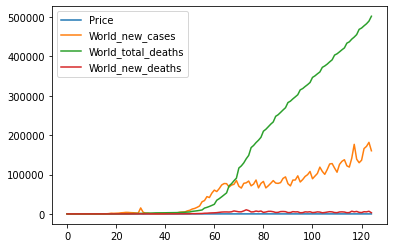

In [ ]:
# Chart 1 - to understand oil prices with other factors
df2.plot()
pyplot.show()

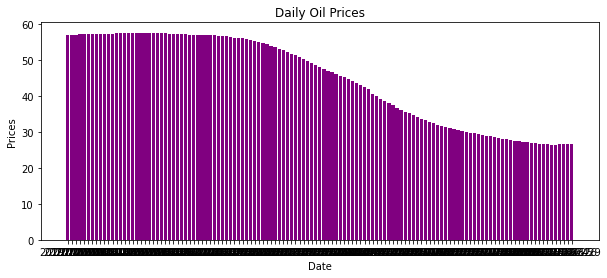

In [ ]:
# Chart 2 - to understand the oil prices
fig, ax = pyplot.subplots(figsize=(10, 4))

ax.bar(df2['Date'],
       df2['Price'],
       color='purple')

ax.set(xlabel="Date",
       ylabel="Prices",
       title= "Daily Oil Prices")

pyplot.show()

In [ ]:
# Chart 3 - to understand the oil prices
from matplotlib import pyplot as plt
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d')
plt.xticks(rotation=90)
plt.plot_date(X['Date'], y, fmt='b-', xdate=True, ydate=False)
plt.ylabel('Prices')
plt.title('OilPricesChart', y=1.1)
plt.grid()
plt.show()

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
# Linear Regression Model full code 

import sklearn

from sklearn.linear_model import LinearRegression


X = df2.index.factorize()[0].reshape(-1,1)
y = df2['Price']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.75,test_size=0.25, random_state=101)

print ("X_train: ", X_train)
print ("y_train: ", y_train)
print("X_test: ", X_test)
print ("y_test: ", y_test)

lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)
y_pred[0:5]

plt.scatter(y_test, y_pred)
print(lr.score(X_test, y_test))

In [ ]:
# Facebook Prophet Model

import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")# for pretty graphs


df = pd.read_csv('/content/COVID-19_and_Price_dataset.csv')
df.dtypes
df2 = df[['Date','Price']]
df2.columns = ['ds','y']
df2.head()


,ds,y
0,2019-12-31,56.949600
1,2020-01-02,57.035067
2,2020-01-03,57.033733
3,2020-01-06,57.087200
4,2020-01-07,57.147333


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


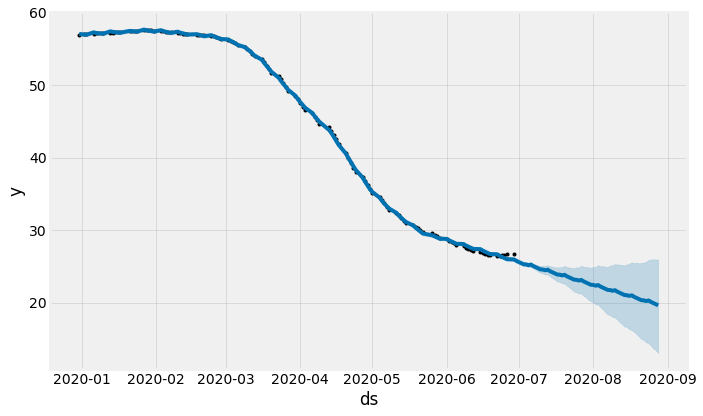

In [ ]:
m1 = Prophet(daily_seasonality=True)

# Fitting the model
m1.fit(df2)
future1 = m1.make_future_dataframe(periods=60)

# Prediction
forecast1 = m1.predict(future1)
forecast1.tail().T

# Plotting the prediction and actual
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
m1.plot(forecast1);

In [ ]:
m1.plot_components(forecast1);

In [97]:
forecast1["Price"] = np.exp(forecast1.yhat).round()
forecast1["Price_lower"] = np.exp(forecast1.yhat_lower).round()
forecast1["Price_upper"] = np.exp(forecast1.yhat_upper).round()
forecast1[(forecast1.ds > "2020-07-07") &
          (forecast1.ds < "2020-07-30")][["ds","Price_lower",
                                        "Price", "Price_upper"]]

submission = forecast1[(forecast1.ds > "2020-07-07") &
          (forecast1.ds < "2020-07-30")][["ds",
                                        "Price"]]

submission.head(5)

,ds,Price
133,2020-07-08,6.325561e+10
134,2020-07-09,5.404001e+10
135,2020-07-10,4.670150e+10
136,2020-07-11,4.580087e+10
137,2020-07-12,4.139721e+10


In [103]:
submission.to_csv('submission_test1.csv')
!cp submission_test1.csv "/content/drive/My Drive"